**A Study on Global Terrorism Attacks**

This project uses the Global Terrorism DataBase Data from 1970 to 2019. With over 190K row, and 135 columns of features.
https://www.start.umd.edu/data-tools/global-terrorism-database-gtd

**Motivaiton:**

1. Over the pass 50 years, over 430,000 people died from Terrorism attacks.

2. The Terrorism attacks has been revived in recent years.

3. Terrorism are not far from us ! (Most Terrorism attacks happen domesticly)

4. Getting a good knowledge of the Terrorism Attacks Statistics will help to prevent some from happening, or take the right action after attack happens not only for military force, police, but also normal citizens.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original = pd.read_excel('globalterrorismdb_0919dist.xlsx')

In [ ]:
# There are too many nulls in some of the 135 columns, drop the columns whose nulls is larger than 2000 out of 191463
df = df_original.loc[:,df_original.isnull().sum()<2000]
# creat datetime columns
df['datetime'] = pd.Series()
for i in range(len(df)):
    if (df.imonth.iloc[i]!=0) and (df.iday.iloc[i]!=0):
        df['datetime'].iloc[i] = pd.to_datetime(df['iyear'].iloc[i].astype(str) + '-' + df['imonth'].iloc[i].astype(str) + '-' + df['iday'].iloc[i].astype(str))
    if i%500==0:
        print(i)

df.to_csv('df.csv')

In [3]:
df = pd.read_csv('df.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

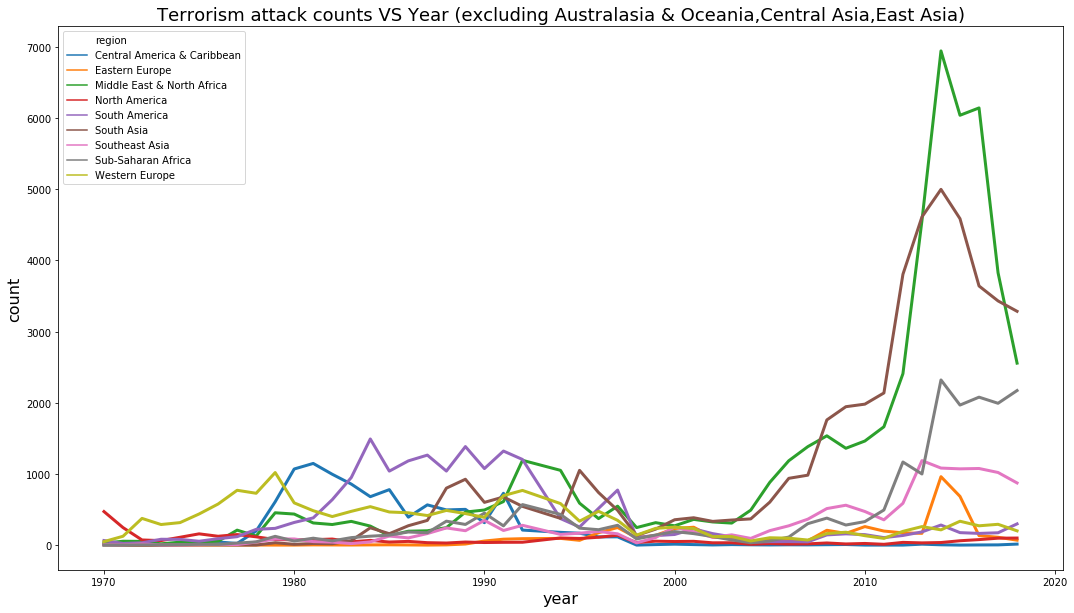

In [4]:
# Plot attack numbers VS Year
temp3 = df.groupby(['region_txt','iyear']).size().to_frame()
temp3.reset_index(inplace=True)

temp3.columns=['region','year','count']
temp4 = temp3[~temp3['region'].isin(['Australasia & Oceania','Central Asia','East Asia'])]

plt.figure(figsize=(18,10))
plt.title('Terrorism attack counts VS Year (excluding Australasia & Oceania,Central Asia,East Asia)',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax1 = sns.lineplot(data=temp4,x='year',y='count',hue='region',linewidth=3)
plt.show()

**The Global Terrorism Attack has revived in recent years, especially in Middle East, Africa (North Africa and Sub-Saharan Africa)**

In [30]:
%%HTML
<div class='tableauPlaceholder' id='viz1574205716316' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;at&#47;attackheatmap&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='attackheatmap&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;at&#47;attackheatmap&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1574205716316');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**According to the research on Global Terrorism Attacks, there are four regions where Terrorism attack happen frequently**

**1. Middle East & North Africa**

**2. Sub-Suharan Africa**

**3. Central & South America**

**4. South & Southeast Asia**

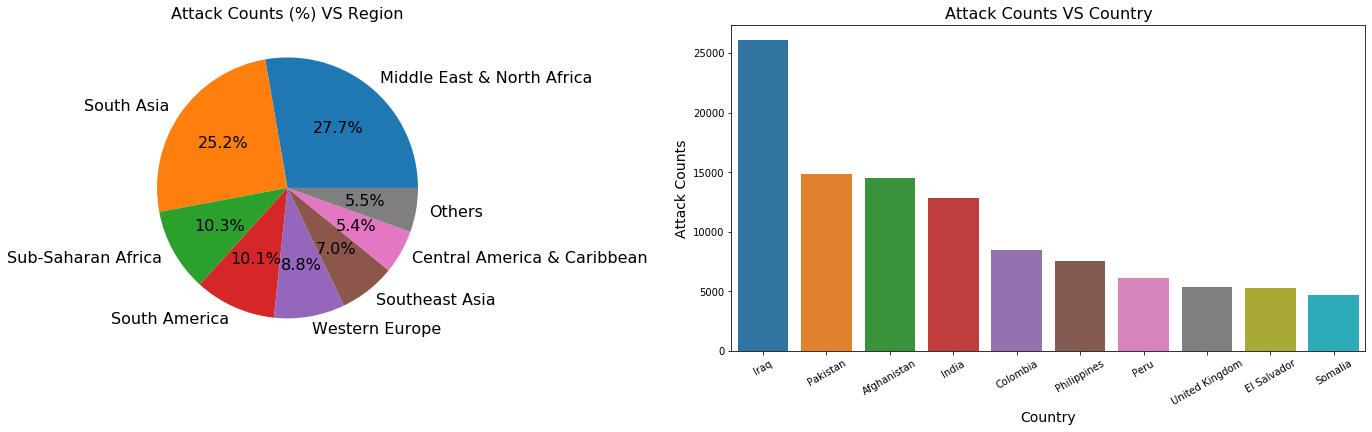

In [71]:
# Pie plot for global attack counts
plt.figure(figsize=(25,6))
ax1 = plt.subplot(121, aspect='equal')


temp_df1 = pd.DataFrame({'country': df_original.region_txt.value_counts().head(7).index.to_list(),
                        'count': df_original.region_txt.value_counts().head(7).values
                        })
temp_df2 = pd.DataFrame({'country':['Others'],'count':df_original.region_txt.value_counts().tail(len(df_original.region_txt.value_counts())-7).sum()})
temp_df3 = pd.concat([temp_df1,temp_df2])

temp_df3.plot(kind='pie',y='count',ax=ax1,labels=temp_df3.country,legend=False,fontsize=16,autopct='%1.1f%%')
ax1.set_title('Attack Counts (%) VS Region',fontsize=16)
ax1.set_ylabel('',fontsize=12)


ax2 = plt.subplot(122)
temp_df4 = df_original.country_txt.value_counts().head(10).reset_index()
sns.barplot(x='index', y='country_txt',data=temp_df4)
ax2.set_title('Attack Counts VS Country',fontsize=16)
plt.xlabel('Country',fontsize=14)
plt.ylabel('Attack Counts',fontsize=14)
plt.xticks(rotation=30)
plt.show()



**1. Most of the attacks are focused on the areas mentioned above. Areas such as East Asia, Middle Asia,Oceania, North America are relatively safe from Terrorism Attacks.**

**2. Western Europe is strange, accounting for about 9% of the Golabal Terrorism Attacks**

In [73]:
%%HTML
<div class='tableauPlaceholder' id='viz1574205845515' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fa&#47;fatalities_100&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='fatalities_100&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fa&#47;fatalities_100&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1574205845515');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**1. North Africa, South America, Southeast Asia, though are among the most Terrorism Targeted regions, the attacks are at small scale in the aspect of fatality.**

**2. Developed countries (North America/ West Euro) also have low fatalities, excluding the 9/11 in 2001**

In [74]:
%%HTML
<div class='tableauPlaceholder' id='viz1574209700598' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BPQWRWBF&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;9BPQWRWBF' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BPQWRWBF&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1574209700598');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**1. Property loss in Africa are at low levels (< 1 million), due to the less developed industry and society**

**2. Developed countries mostly suffer from high property loss**

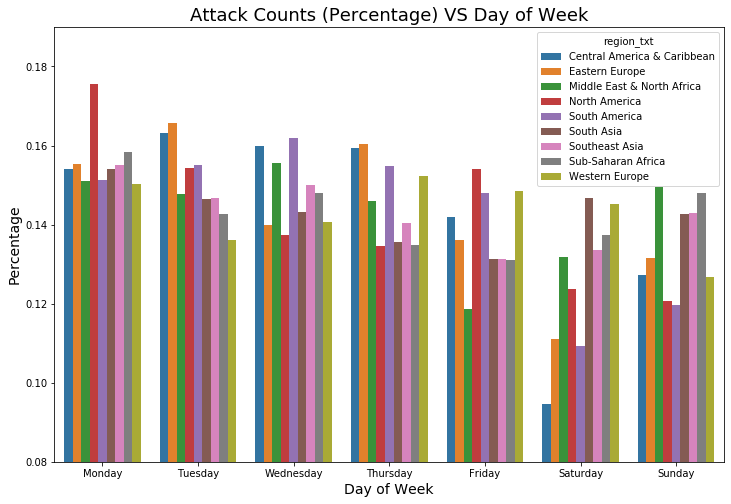

In [202]:
# day of week
df['dayofweek'] = df['datetime'].dt.day_name()
df_drop_region = df[~df['region_txt'].isin(['Australasia & Oceania','Central Asia','East Asia'])]

plt.figure(figsize=(12,8))
count = df_drop_region[['region_txt','dayofweek','eventid']].groupby(['region_txt','dayofweek']).count()
count_percen = count.div(count.groupby('region_txt').transform('sum')).reset_index()
sns.barplot(x='dayofweek', y='eventid', hue='region_txt', data=count_percen,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of Week',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.ylim(0.08,0.19)
plt.title('Attack Counts (Percentage) VS Day of Week',fontsize=18)
plt.show()

**Terrorists tend to launch attack on weekdays compared instead of weekends**

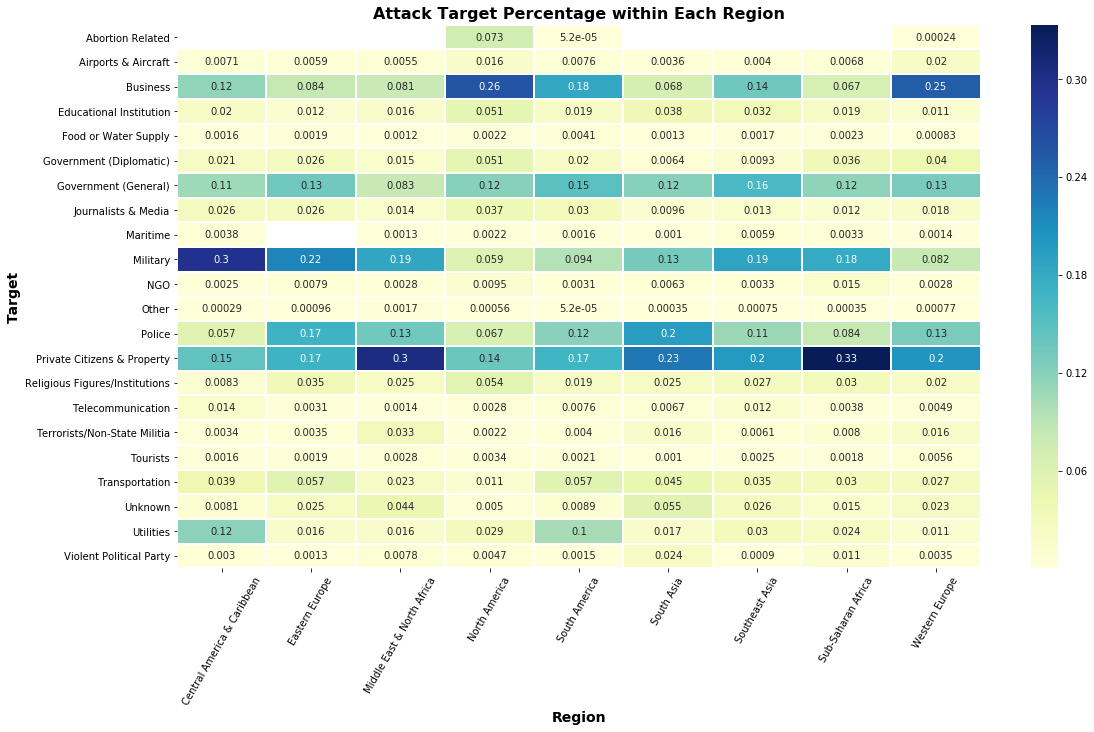

In [203]:
plt.figure(figsize=(18,10))
count2 = df_drop_region[['targtype1_txt','region_txt','eventid']].groupby(['targtype1_txt','region_txt']).count()
count2_percen = count2.div(count2.groupby('region_txt').transform('sum')).reset_index()

ax = sns.heatmap(count2_percen.pivot("targtype1_txt","region_txt",'eventid'),cmap="YlGnBu",linewidth=1,annot=True)
plt.xticks(rotation=60)
plt.title('Attack Target Percentage within Each Region',fontsize=16, weight='bold')
plt.xlabel('Region',fontsize=14, weight='bold')
plt.ylabel('Target',fontsize=14, weight='bold')
plt.show()

**1. Private Citizens & Properties are the common targets all around the world.**

**2. In developed countries, Business facility are easy to become attack target, military facility are less vulnerable compared to other regions.**


In [159]:
# pie plot funtion (=country/region, =feature1, feature2)
from matplotlib.cm import get_cmap
color1 = get_cmap('tab20c').colors[0:4]
color2 = get_cmap('tab20c').colors[4:8]
color3 = get_cmap('tab20c').colors[8:12]
color4 = get_cmap('tab20c').colors[12:16]

def pie_plot(country_region,name, feature1,fea_name,feature2, number,title,ax_,colors):
    #plt.figure(figsize=(10,10))
    #ax1 = plt.subplot(121, aspect='equal')
    temp0 = df_original[(df_original[country_region].isin(name)) & (df_original[feature1]==fea_name)][feature2]
    temp11 = pd.DataFrame({'country_region': temp0.value_counts().head(number).index.to_list(),
                        'count': temp0.value_counts().head(number).values
                        })
    temp12 = pd.DataFrame({'country_region':['Others'],'count':temp0.value_counts().tail(len(temp0.value_counts())-number).sum()})
    temp13 = pd.concat([temp11,temp12])

    temp13.plot(kind='pie',y='count',ax=ax_,labels=temp13['country_region'],legend=False,fontsize=25,autopct='%1.1f%%',colors=colors)
    ax_.set_title(title,fontsize=30,weight='bold')
    ax_.set_ylabel('')

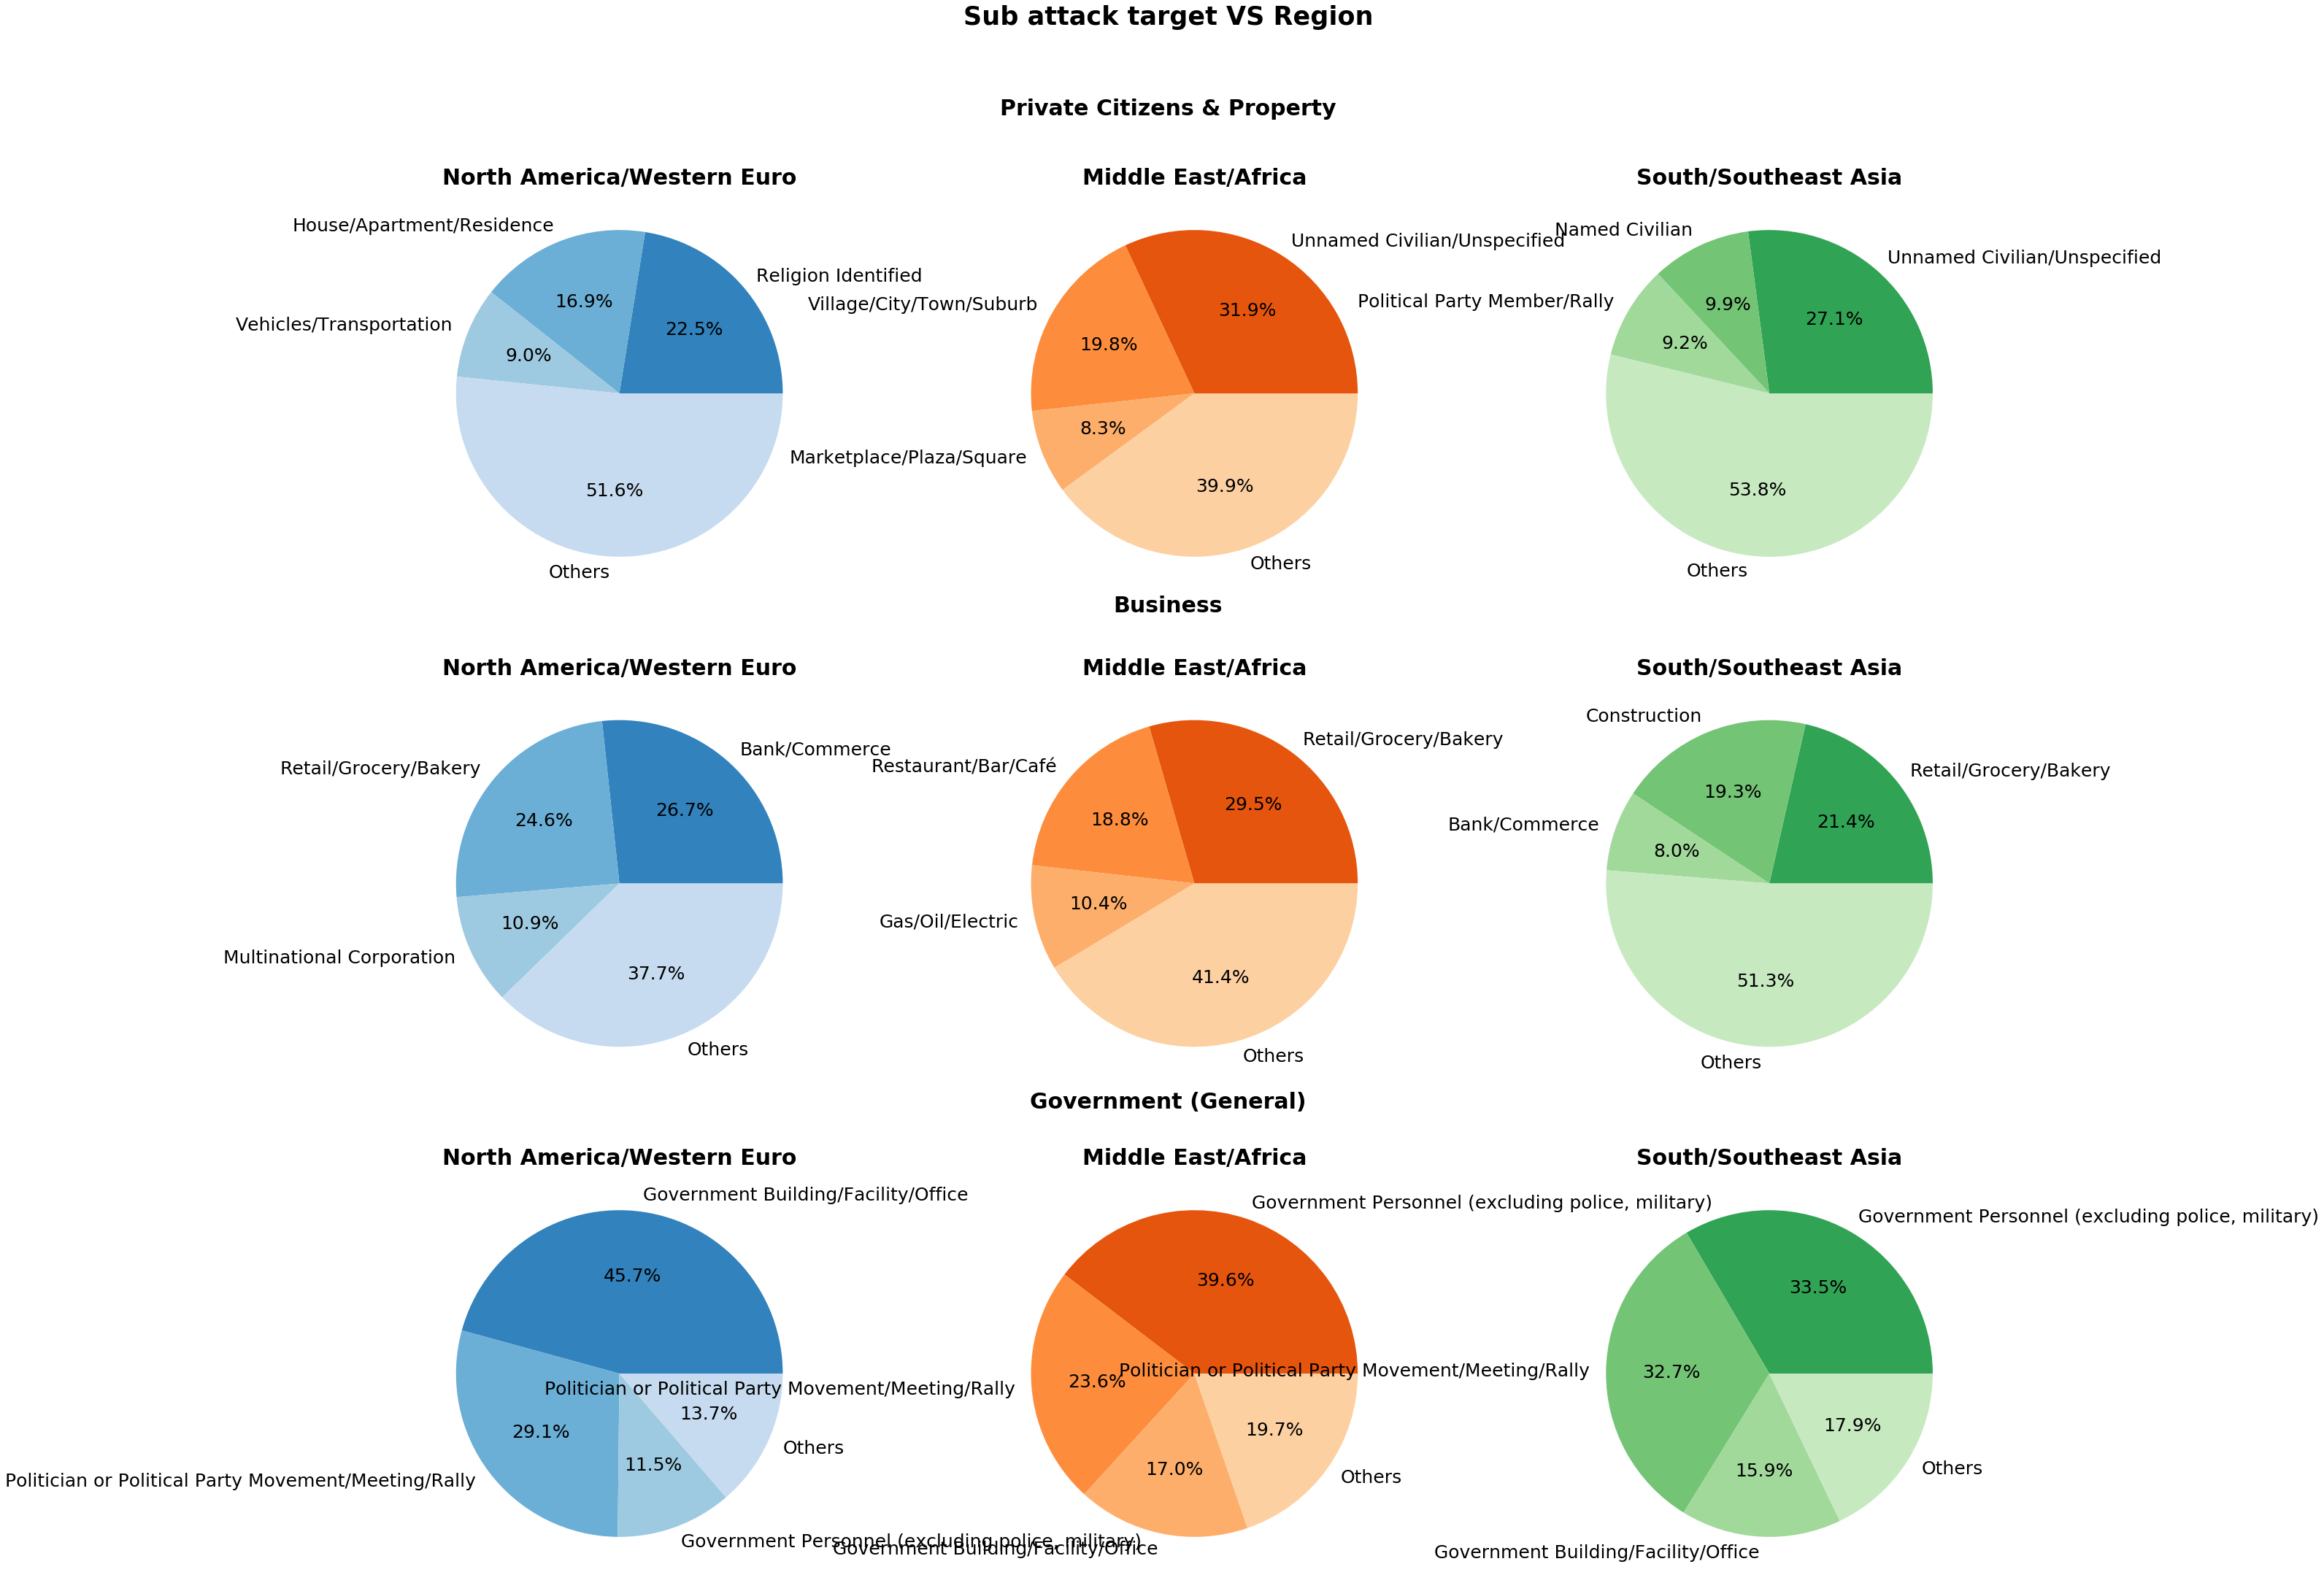

In [160]:
fig = plt.figure(figsize=(40,35))
fig.suptitle('Sub attack target VS Region',fontsize=35,weight='bold')
plt.figtext(0.5,0.92,'Private Citizens & Property', fontsize=30, ha='center',weight='bold')
ax1 = plt.subplot(331, aspect='equal')
pie_plot('region_txt',['Western Europe','North America'],'targtype1_txt','Private Citizens & Property','targsubtype1_txt',3,'North America/Western Euro',ax1,color1)

ax2 = plt.subplot(332, aspect='equal')
pie_plot('region_txt',['Middle East & North Africa','Sub-Saharan Africa'],'targtype1_txt','Private Citizens & Property','targsubtype1_txt',3,'Middle East/Africa',ax2,color2)

ax3 = plt.subplot(333, aspect='equal')
pie_plot('region_txt',['Southeast Asia','South Asia'],'targtype1_txt','Private Citizens & Property','targsubtype1_txt',3,'South/Southeast Asia',ax3,color3)

#fig.suptitle('Business',fontsize=20)
plt.figtext(0.5,0.65,'Business', fontsize=30, ha='center',weight='bold')
ax1 = plt.subplot(334, aspect='equal')
pie_plot('region_txt',['Western Europe','North America'],'targtype1_txt','Business','targsubtype1_txt',3,'North America/Western Euro',ax1,color1)

ax2 = plt.subplot(335, aspect='equal')
pie_plot('region_txt',['Middle East & North Africa','Sub-Saharan Africa'],'targtype1_txt','Business','targsubtype1_txt',3,'Middle East/Africa',ax2,color2)

ax3 = plt.subplot(336, aspect='equal')
pie_plot('region_txt',['Southeast Asia','South Asia'],'targtype1_txt','Business','targsubtype1_txt',3,'South/Southeast Asia',ax3,color3)


#fig.suptitle('Government (General)',fontsize=20)
plt.figtext(0.5,0.38,'Government (General)', fontsize=30, ha='center',weight='bold')
ax1 = plt.subplot(337, aspect='equal')
pie_plot('region_txt',['Western Europe','North America'],'targtype1_txt','Government (General)','targsubtype1_txt',3,'North America/Western Euro',ax1,color1)

ax2 = plt.subplot(338, aspect='equal')
pie_plot('region_txt',['Middle East & North Africa','Sub-Saharan Africa'],'targtype1_txt','Government (General)','targsubtype1_txt',3,'Middle East/Africa',ax2,color2)

ax3 = plt.subplot(339, aspect='equal')
pie_plot('region_txt',['Southeast Asia','South Asia'],'targtype1_txt','Government (General)','targsubtype1_txt',3,'South/Southeast Asia',ax3,color3)
plt.show()

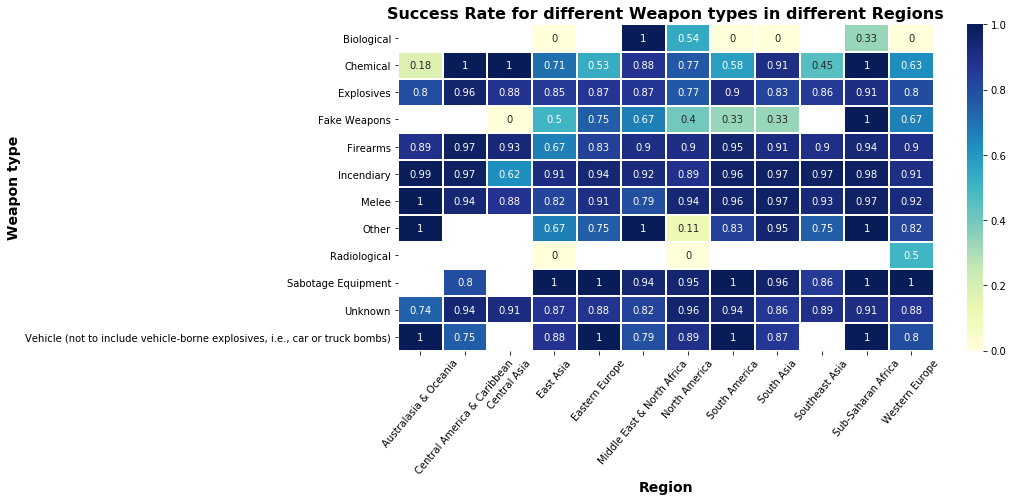

In [197]:
plt.figure(figsize=(12,6))
count3 = df_original[['weaptype1_txt','region_txt','success']].groupby(['weaptype1_txt','region_txt']).sum()
count3_percen = count3.div(df_original[['weaptype1_txt','region_txt','success']].groupby(['weaptype1_txt','region_txt']).count()).reset_index()

ax = sns.heatmap(count3_percen.pivot("weaptype1_txt","region_txt",'success'),cmap="YlGnBu",linewidth=1,annot=True)
plt.xticks(rotation=50)
plt.title('Success Rate for different Weapon types in different Regions',fontsize=16, weight='bold')
plt.xlabel('Region',fontsize=14, weight='bold')
plt.ylabel('Weapon type',fontsize=14, weight='bold')
plt.show()

**1. Success rate is low in those regions where attacks happen less frequent**

**2. In Sub-Saharah Africa, every type of attack result in very high success rate**

In [191]:
%%HTML
<div class='tableauPlaceholder' id='viz1574227978902' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4S&#47;4S7PHPW6F&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;4S7PHPW6F' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4S&#47;4S7PHPW6F&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1574227978902');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Americans become target more often in Central/South America, though they do get attacked worldwide, while Frech are more vulnarable in Africa**

##########

**Take-away Message:**

**1. There are four regions in the world suffering from Terrorism attack extensivly:**

   Middle East & North Africa

   Sub-Suharan Africa

   Central & South America

   South & Southeast Asia
   
**2. In developed countries, Terrorism attacks cause more property loss/less fatality compared other regions**

**3. Private citizen & Property and Government (general) facility are the most commom target globally. In developing/less developed contries, Military targert account for a large percentage. In developed countries, Bussiness targets are more vulnerable.**

**4. People from developed countries are easy to become Terrorism attack victims as foreigners. American people are easy to become attack targets as foreigners accross the world, and more focused in Central/South America, French receive more attacks in Africa**